<a href="https://colab.research.google.com/github/Nvictin/Nvictin/blob/main/Estaca_torpedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lançamento de uma Estaca Torpedo modelo T-98.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mat

#Dados

Cd= 0.35
Diâmetro= 1.067
Ap= np.pi*0.25*Diâmetro
M= 10
m= M* pow(10,3)
g=9.81
W= m*g
p=1025
dt= 0.015

print("Coeficiente de arrasto =",Cd ,"Kg/m")
print("Diâmetro da estaca=",Diâmetro,"m")
print("Área da Ponta=",Ap,"m^2")
print("Massa=",m,"Kg")
print("Peso=",W,"kN")
print("Variação de tempo=",dt,"segundos")

Coeficiente de arrasto = 0.35 Kg/m
Diâmetro da estaca= 1.067 m
Área da Ponta= 0.8380198403450773 m^2
Massa= 10000 Kg
Peso= 98100.0 kN
Variação de tempo= 0.015 segundos


A Âncora será lançada de um estado de repouso que se encontra a 100m do leito marinho, vale ressaltar que quanto mais profundo se localiza a estaca, as forças horizontais presentes 
como a correnteza serão despresiveis, então não existe vatagem em subir a âncora para que seja lançada à uma altura superior de 150m, o recomendado é que esteja entre 150m à 30m
do fundo do oceano.

In [ ]:
v=[0]
Tempo=[0]
F_d=[]
V=[]
i=0
F_d.append(0.5*pow(v[i],2)*p*Ap*Cd)

while round(F_d[i],3) != W:
  V.append(v[i]+(dt/m)*(W-F_d[i]))
  i=i+1
  Tempo.append(Tempo[i-1]+dt)
  v.append(V[i-1])
  F_d.append(0.5*(v[i]**2)*p*Ap*Cd)
  




Gráfico da Velocidade em relação ao tempo necessário para a estaca atingir a velocidade terminal.

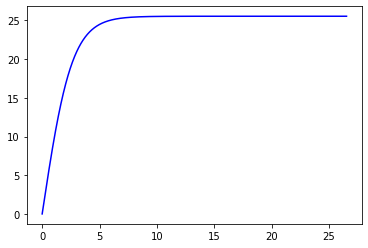

In [ ]:
plt.plot(Tempo,v, "blue")

In [ ]:
vi=[V[i-1]]
ds=[dt*vi[0]]
Su=5
Sua=[2]
a=1
Nu=9
T=[0]
k=0
profundidade=[ds[0]]

In [ ]:
Rp=Nu*Ap*Su
Rl=[np.pi*Su*ds[0]*Diâmetro]
Rt=[Rp+Rl[0]]

In [ ]:
Ei= [0.5*vi[0]*m]
U= [ds[0]*Rt[0]]
DU=[Ei[0]-U[0]]
Vi= [np.sqrt(DU[0]/m)]

In [ ]:
while DU[k] > 0:
  vi.append(Vi[k])
  k=k+1
  ds.append(dt*vi[k])
  T.append(T[k-1]+dt)
  profundidade.append(ds[k]+profundidade[k-1])
  Sua.append(5+2*profundidade[k])
  Rl.append((np.pi)*Su*ds[k]*Diâmetro)
  Rt.append(Rp+Rl[k])
  Ei.append(0.5*(vi[k]**2)*m)
  U.append(Rt[k]*ds[k])
  DU.append(Ei[k]-U[k])
  Vi.append(np.sqrt(DU[k]/m))
print(T)


  




[0, 0.015, 0.03, 0.045, 0.06, 0.075, 0.09, 0.105, 0.12, 0.135, 0.15000000000000002, 0.16500000000000004, 0.18000000000000005, 0.19500000000000006, 0.21000000000000008, 0.2250000000000001, 0.2400000000000001, 0.2550000000000001, 0.27000000000000013, 0.28500000000000014, 0.30000000000000016, 0.31500000000000017, 0.3300000000000002, 0.3450000000000002, 0.3600000000000002, 0.3750000000000002, 0.39000000000000024, 0.40500000000000025, 0.42000000000000026, 0.4350000000000003]


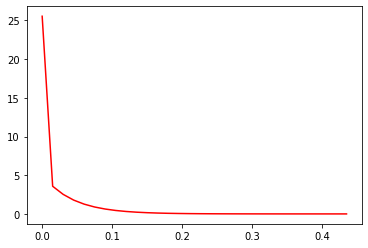

In [ ]:
plt.plot(T,vi,"red")